# Presentación de la empresa, organización o problema específico  

#### De acuerdo a la Organización Mundial de la Salud (OMS), ACV es la segunda causa de muerte a nivel global, responsable de aproximadamente 11% de las muertes totales.
#### Este set de datos es utilizado para predecir si un paciente es propenso a tener un ACV basado en los parametros como género, edad, enfermedades varias, y estado de fumador. Cada fila en los datos provee información relevante sobre el paciente.


#### Preguntas y objetivos de la investigación.

.¿Cuál es el género más propenso a tener un acv?  
.¿Cuál es el grado de influencia de ser fumador?  
.¿Existe relación entre el índice de masa corporal y el nivel de glucosa para contraer un acv?  
.¿Qué tanto influye el tipo de trabajo en la posibilidad de tener un acv?  
.¿Aumentan las probabilidades de tener un acv a mayor edad?    
.¿Tener hipertensión influye a la hora de tener un acv?  // Se cambió la pregunta en base a la corrección de Maxi, no tenemos niveles de hipertensión, sólo veradero o falso
.¿Tiene relación el estado marital con tener un acv?  


El objetivo de la investigación es determinar cuales son las variables mas influyentes a la hora de provocar un acv. Utilizando un modelo de predicción vamos a poder determinar si una persona es mas propensa a tener un acv.





#### 3. Conformación del equipo de trabajo. 
Martin Marino  
Leandro Bruzzo  

# Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)
#### El dataset fue obtenido de la plataforma Kaggle desde el siguiente link : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

#### Información sobre el data set:
- Creador: fedesoriano - https://www.kaggle.com/fedesoriano

- Información de los atributos: 
1) id: identificador único  
2) gender: "Male", "Female" o "Other" (Masculino, Femenino u Otro)  
3) age: Edad del paciente  
4) hypertension: 0 si el paciente no tiene hipertensión , 1 si el paciente tiene hipertensión  
5) heart_disease: 0 si el paciente no tiene enfermedades del corazón, 1 si el paciente tiene enfermedades del corazón  
6) ever_married: "No" o "Yes" (No o Sí)  
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (Niño, trabajo en el sector público, nunca trabajó, privado o monotributista)  
8) Residence_type: "Rural" or "Urban"   
9) avg_glucose_level: nivel promedio de glucosa en la sangre  
10) bmi: Índice de masa corporal  
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* (Fumador frecuente, nunca fumó, fuma, desconocido)  
12) stroke: 1 si el paciente tuvo un ACV 0 si no lo tuvo (Variable Target)  
*Nota: 'Uknown' en smoking_status indica que no se registró un estado del paciente.

Información sobre Kaggle:
Kaggle, una subsidiaria de Google LLC, es una comunidad en línea de científicos de datos y profesionales del aprendizaje automático.

#### Generación del primer Data Wrangling y EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

In [ ]:
#Librerías neceasrias para el correcto funcionamiento del jupyter (descomentar para ejecutar por primera vez y luego volver a comentarlo)

# import sys
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install pandas_profiling
# !{sys.executable} -m pip install plotly.express
# !{sys.executable} -m pip install ipywidgets
# !{sys.executable} -m pip install nbformat
# !{sys.executable} -m pip install sklearn

#### Importamos todas las librerias de visualización, modelos de ML y validación

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import plotly.express as px

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

In [ ]:
df.shape

In [ ]:
#Creamos un dataframe con las columnas work_type y residence_type en booleano (Es decir, 0 y 1) para ser utilizados en la matriz de correlación

df.rename(columns = {'Residence_type':'residence_type'}, inplace = True)
df_2 = df #Realizamos una copia del dataframe original para la matriz de correlación
#Reemplazamos los valores Yes y No de ever_married con 1 y 0
df_2['ever_married'].replace(
                to_replace=['Yes', 'No'], 
                value=[1,0,], 
                inplace=True, 
)
df_2['residence_type'].replace(
                to_replace=['Urban', 'Rural'], 
                value=[0,1,], 
                inplace=True, 
)

df_2

In [ ]:
df_2.describe().T

#### EDA Utilizando la librería pandas_profiling

In [ ]:
df_2.profile_report(title='Data Profiling')

#### Con el siguiente gráfico de torta podemos observar el gran desbalanceo de nuestro set de datos. Esto será crucial a la hora de preparar nuestros algoritmos, ya que un desbalance tan marcado puede ocasionar una gran pérdida de precisión.


In [ ]:
df_pie = df.copy()
df_pie['stroke'].replace(
                to_replace=[0, 1], 
                value=["No","Yes"], 
                inplace=True)
fig = px.pie(df_pie, names="stroke",values='id', hole=.3, title='Stroke Distribution')
fig.show()

In [ ]:
df.stroke.value_counts()

In [ ]:
#Creamos un df sin la columna id para ser utizado en el mapa de correlación, ya que el mismo es un identificador único.
df_2Heatmap = df_2.drop(columns=['id'])
plt.figure(dpi = 120,figsize= (8,6))
mask = np.triu(np.ones_like(df_2Heatmap.corr(),dtype = bool))
sns.heatmap(df_2Heatmap.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', vmax=1, vmin=0)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

#### Con el mapa de correlación y el Data Profiling, se pueden observar las correlaciones positivas y/o negativas de las variables.

Se ha decidido descartar la columna residence_type, ya que esta no presenta un impacto en el dataset ni correlaciones positivas y/o negativas de forma significante. (-0,02 como el mayor coeficiente)

In [ ]:
#Eliminamos la columna residence_type antes de seguir analizando en profundida el dataset.
df.drop(['residence_type'], axis=1, inplace=True)
df.info()

#### A continuación realizaremos gráficos de boxplot para todas las columnas, con el fin de observar con mayor detalle la distribución de valores junto a la presencia (o no) de outliers.

In [ ]:
variables = ['bmi', 'avg_glucose_level', 'age']

fig, axes = plt.subplots(1, len(variables), figsize=(10,5))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax)
plt.tight_layout()

plt.show()

#### En los gráficos de boxplot se pueden observar una gran presencia de outliers (valores atípicos), estos se mantendrán en el dataset ya que en este caso en particular, no presenta un problema, siendo que son valores válidos y representan la gran cantidad de datos. Eliminarlos reduciría la utilidad del dataset de forma drástica

#### Filtros y limpieza del dataset a utilizar para los modelos de ML

In [ ]:
#Vemos los valores unicos para la columna de smoking status y posteriormente excluimos los desconocidos
df['smoking_status'].unique()

#### En smoking_status se puede observar que tenemos valores "Unknown", se realizará un conteo de los mismos para observar el impacto de su eliminación, ya que dicho estado no nos aporta nada en el análisis.

In [ ]:
df.smoking_status.value_counts()

#### Unknown tiene una cantidad de registros de 1544, aproximadamente el 30% de los datos. Debido a que no podemos asumir si esa persona fuma o no, se tomará la decisión de eliminarlos. 

In [ ]:
#Eliminar los datos unknown de la columna smoking_status

df['smoking_status'].values
df = df[df.smoking_status != 'Unknown']
df.smoking_status.value_counts()

#### BMI tiene 140 valores nulos, los mismos podrían ser eliminados pero debido a que el dataset perdió gran cantidad de datos al eliminar los registros con smoking_status = Unknown, se precederá a utilizar un promedio para los mismos.


In [ ]:
for i in df.columns[df.isnull().any(axis=0)]:   
    df[i].fillna(df[i].mean(),inplace=True)
df.info()

#### Como se pudo observar en la línea anterior, se han completados los valores NaN de la columna bmi con el valor promedio de los mismos

#### Hay que tener en consideración la pérdida de datos, hemos pasado de 5110 registros a 3566. Sin embargo, estos datos siguen siendo válidos, más limpios y pueden ser utilizados para el modelo de ML. 

In [ ]:
df_smoking = df[(df['smoking_status']) != 'Unknown']
df_smoking2 = df.copy()
df_smoking2['stroke'].replace(
                to_replace=[0, 1], 
                value=["No","Yes"], 
                inplace=True)
ax = sns.catplot(data=df_smoking2, kind='violin', x='smoking_status', y='age',   hue='stroke', split=True)
ax.set(xlabel='Smoking Status', ylabel='Edad', title='Categorización de ACV por edad y estado de fumador.')
plt.show()

In [ ]:
df.gender.value_counts()

#### En la columna gender podemos observar que hay un único registro con el género other, por motivos de espacio de memoria el mismo será eliminado ya que al preparar el dataset para utilizar algoritmos de clasificación empleando data dummies, se creará una columna extra en consecuencia de este único valor.

In [ ]:
df = df[df.gender != 'Other']
df.gender.value_counts()

#### Aplicación de modelos de ML

#### Una vez realizado los diferentes tipos de análisis y limpieza de datos necesaria, es momento de aplicar algoritmos de clasificación.

In [ ]:
#Creamos un data dummie para obtener las variables categóricas como booleanas (es decir 0,1)
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy = df_dummy.drop('id', axis=1)
df_dummy    

In [ ]:
#Separamos los datos de entrada de la salida
X = df_dummy.drop('stroke', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.stroke #Defino el Target

In [ ]:
#Me quedo con 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [ ]:
tree = DecisionTreeClassifier(max_depth=2, random_state = 42, class_weight="balanced") #Creamos el modelo

#### Se agregó el hiperparámetro class_weight="balanced" para ayudar al algoritmo DecisionTree a trabajarlo de forma desbalanceada.

In [118]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=42)

In [119]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [120]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy Score')
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

Accuracy Score
% de aciertos sobre el set de entrenamiento: 0.8183730715287517
% de aciertos sobre el set de evaluación: 0.8134642356241234


In [121]:
train_accuracy_balanced = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy_balanced = balanced_accuracy_score(y_test, y_test_pred)

print('\nBalanced Accuracy Score')
print('% de aciertos sobre el set de entrenamiento:', train_accuracy_balanced)
print('% de aciertos sobre el set de evaluación:',test_accuracy_balanced)


Balanced Accuracy Score
% de aciertos sobre el set de entrenamiento: 0.7333382066276803
% de aciertos sobre el set de evaluación: 0.6685520361990951


In [122]:
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print('\nRecall Score')
print('% de aciertos sobre el set de entrenamiento:', train_recall)
print('% de aciertos sobre el set de evaluación:',test_recall)



Recall Score
% de aciertos sobre el set de entrenamiento: 0.6381578947368421
% de aciertos sobre el set de evaluación: 0.5


In [123]:
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('\nF1 Score')
print('% de aciertos sobre el set de entrenamiento:', train_f1)
print('% de aciertos sobre el set de evaluación:',test_f1)



F1 Score
% de aciertos sobre el set de entrenamiento: 0.27247191011235955
% de aciertos sobre el set de evaluación: 0.27322404371584696


#### Como se pudo observar, el class_weight="balanced" reduce el rendimiento del modelo, pero es necesario ya que de no incluirlo, estaríamos basándonos en la mayoría de datos y no en la minoría; con este hiperparámetro el algoritmo le da la misma importancia a ambos grupos.


AUC for our classifier is: 0.7638763197586727


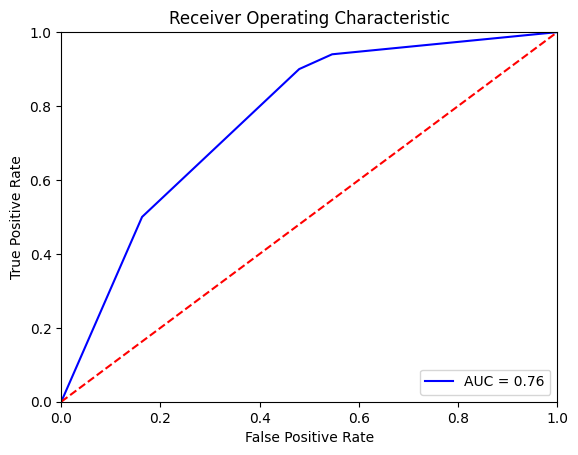

In [124]:
from sklearn.metrics import roc_curve, auc

class_probabilities = tree.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Matriz de confusión para evaluar el desempeño del algoritmo
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(tree, X_test, y_test)
plt.show()

#### Además del algoritmo DecisionTree, aplicaremos KNeighborsClassifier y Random Forest para ver su efectividad.

In [ ]:
df_dummy.head()

In [ ]:
df_dummy.info()

In [ ]:
#Aplicamos un n_neighbors de 6 al df
knn = KNeighborsClassifier(n_neighbors=6)
X = df_dummy[['age',
              'hypertension',
              'heart_disease', 
              'avg_glucose_level',
              'bmi', 
              'gender_Male', 
              'ever_married', 
              'work_type_Never_worked', 
              'work_type_Private',
              'work_type_Self-employed', 
              'work_type_children', 
              'smoking_status_never smoked',
              'smoking_status_smokes']]
y = df[['stroke']]
knn.fit(X, y) #Entrenamos el modelo

In [ ]:
#Medimos la efectividad del modelo

n_neighbors = 6

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Precisión del K-NN en set de entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Precisión del  K-NN en set de evaluación: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [ ]:
#Asignamos el valor n_neighbors=6 basándonos en el siguiente código, donde vemos distintos valores k y la precisión obtenida.

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [ ]:
#Confirmamos la precisión viendo la matriz de confusión y el reporte sobre el conjunto de test, 
# que nos detalla los aciertos y fallos
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

#### Como último algoritmo utilizaremos el RandomForestClassifier con el respectivo hiperparámetro class_weight="balanced", con el mismo fin del DecisionTree, es decir, trabajar en un dataset desbalanceado

In [ ]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=42, n_estimators=200,
                              class_weight="balanced" ,max_features="log2")
model.fit(X_train, y_train)

In [ ]:
y_test_pred = model.predict(X_test) #Prediccion en Test

In [ ]:
#Calculo el accuracy en Test
train_accuracy_balanced = balanced_accuracy_score(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
#Calculo el accuracy en Test
test_accuracy_balanced = balanced_accuracy_score(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Accuracy Score')
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

print('\nBalanced Accuracy Score')
print('% de aciertos sobre el set de entrenamiento:', train_accuracy_balanced)
print('% de aciertos sobre el set de evaluación:',test_accuracy_balanced)

print('\nRecall Score')
print('% de aciertos sobre el set de entrenamiento:', train_recall)
print('% de aciertos sobre el set de evaluación:',test_recall)


print('\nF1 Score')
print('% de aciertos sobre el set de entrenamiento:', train_f1)
print('% de aciertos sobre el set de evaluación:',test_f1)


In [ ]:
#Matriz de confusión para evaluar el desempeño del algoritmo RANDOM FOREST
print(confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(model, X_test, y_test)
plt.show()